Análise do COVID usando regressão linear, exponencial e modelo sigmóide.

In [1]:
using CSV, DataFrames, Plots
gr()
plot(rand(3), rand(3))
nothing

In [5]:
download("https://opendata.ecdc.europa.eu/covid19/casedistribution/csv", "covid.csv")
data = CSV.read("covid.csv")
first(data, 5)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId
,String,Int64,Int64,Int64,Int64,Int64,String,String
1,30/03/2020,30,3,2020,8,1,Afghanistan,AF
2,29/03/2020,29,3,2020,15,1,Afghanistan,AF
3,28/03/2020,28,3,2020,16,1,Afghanistan,AF
4,27/03/2020,27,3,2020,0,0,Afghanistan,AF
5,26/03/2020,26,3,2020,33,0,Afghanistan,AF


In [7]:
rename!(data, Dict(
        Symbol("countriesAndTerritories") => "CountryExp",
        :cases => "NewConfCases"
    ))
first(data, 5)

ArgumentError: ArgumentError: Tried renaming :countriesAndTerritories to :CountryExp, when :countriesAndTerritories does not exist in the Index.

In [9]:
df = data[findall(data.CountryExp .== "Brazil"),:]
df

,dateRep,day,month,year,NewConfCases,deaths,CountryExp,geoId,countryterritoryCode
,String,Int64,Int64,Int64,Int64,Int64,String,String,String⍰
1,30/03/2020,30,3,2020,352,22,Brazil,BR,BRA
2,29/03/2020,29,3,2020,487,22,Brazil,BR,BRA
3,28/03/2020,28,3,2020,502,15,Brazil,BR,BRA
4,27/03/2020,27,3,2020,482,20,Brazil,BR,BRA
5,26/03/2020,26,3,2020,232,11,Brazil,BR,BRA
6,25/03/2020,25,3,2020,310,12,Brazil,BR,BRA
7,24/03/2020,24,3,2020,345,9,Brazil,BR,BRA
8,23/03/2020,23,3,2020,418,7,Brazil,BR,BRA
9,22/03/2020,22,3,2020,224,7,Brazil,BR,BRA


In [10]:
y = reverse(df.NewConfCases);

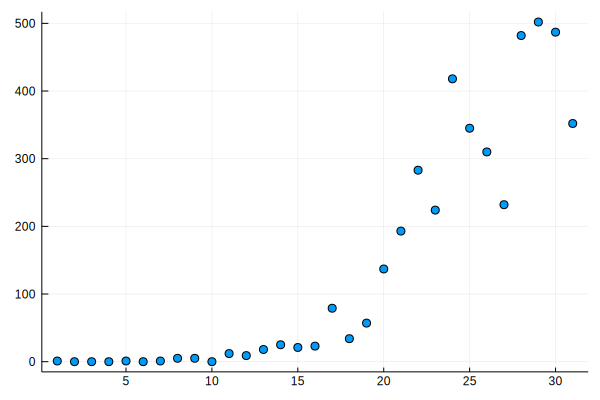

In [12]:
scatter(y[findfirst(y .> 0):end], leg=false)

In [13]:
y = reverse(df.NewConfCases);
y = y[findfirst(y .> 0):end]

31-element Array{Int64,1}:
   1
   0
   0
   0
   1
   0
   1
   5
   5
   0
  12
   9
  18
   ⋮
 137
 193
 283
 224
 418
 345
 310
 232
 482
 502
 487
 352

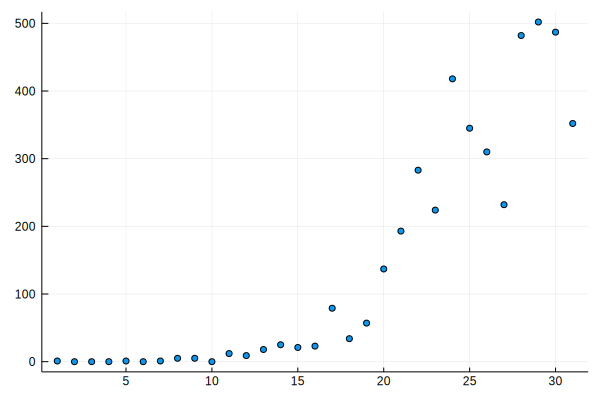

In [14]:
scatter(y, ms=3, leg=false)

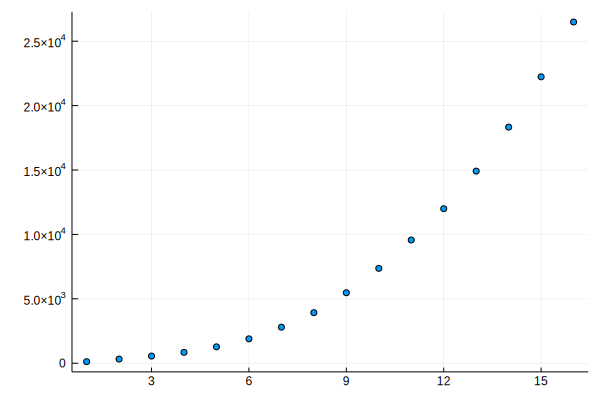

In [18]:
scatter(cumsum(y), ms=3, leg=false)

## Quadrados Mínimos

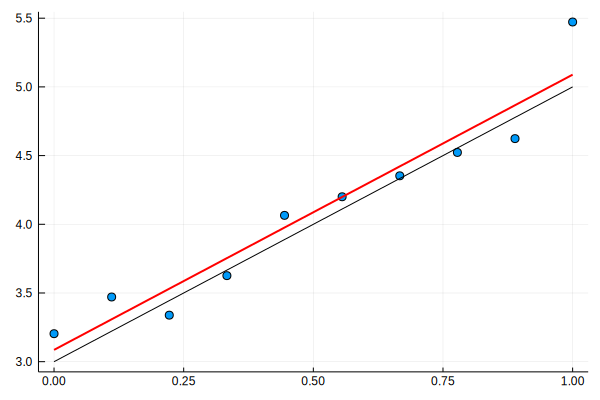

In [15]:
using Random

Random.seed!(0)
n = 10
x = range(0, 1, length=n)
y = 2x .+ 3 + randn(n) * 0.3
scatter(x, y, leg=false)
plot!(x, 2x .+ 3, c=:black)

M = [n  sum(x);  sum(x)   sum(x.^2)]
c = [sum(y);  sum(x .* y)]

β = M \ c
plot!(x, β[1] .+ β[2] * x, c=:red, lw=2)

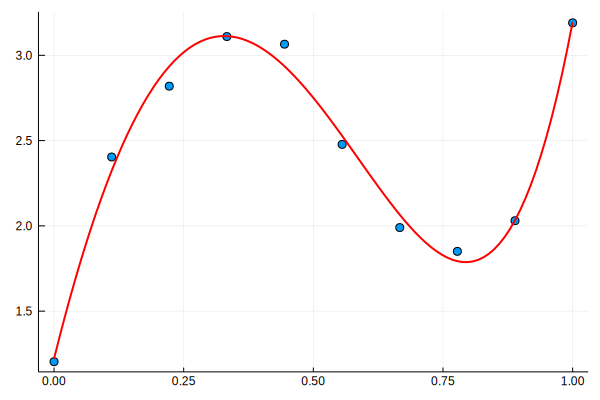

In [16]:
using Random

Random.seed!(0)
n = 10
x = range(0, 1, length=n)
y = exp.(x) + sin.(2π * x) + 4 * x .* (1 .- x) + randn(n) * 0.3
scatter(x, y, leg=false)

X = [ones(n) x x.^2 x.^3 sin.(x)]

M = X' * X
c = X' * y

β = M \ c

xg = range(minimum(x), maximum(x), length=100)
X = [ones(length(xg)) xg xg.^2 xg.^3 sin.(xg)]
plot!(xg, X * β, c=:red, lw=2)

## COVID-19

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[28]:1
└ @ Core In[28]:1


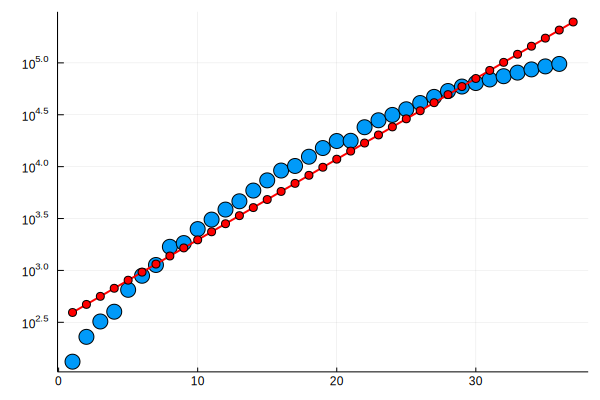

In [28]:
df = data[findall(data[:CountryExp] .== "Italy"),:]
y = reverse(df.NewConfCases);
y = cumsum(y)
y = y[findfirst(y .>= 100):end]

n = length(y)
x = range(1, n, length=n)

X = [ones(n)  x]
ytil = log.(y)

M = X' * X
c = X' * ytil

β = M \ c

scatter(x, y, leg=false, ms=8)

xg = range(1, n + 1, length=n+1)
#xg = range(1, n, length=n)
X = [ones(length(xg))  xg]
plot!(xg, exp.(X * β), c=:red, lw=2)
scatter!(xg, exp.(X * β), c=:red, lw=2, yaxis=:log)

## Regressão Não-Linear

In [23]:
using NLPModels, NLPModelsIpopt

In [119]:
df = data[findall(data.CountryExp .== "Brazil"),:]
y = reverse(df.NewConfCases);
y = cumsum(y)
y = y[findfirst(y .≥ 100):end]

n = length(y)
x = range(1, n, length=n)
x = range(0, 1, length=n)

h(β, x) = β[3] / (1 + exp(-β[1] - β[2] * x))
nlp = ADNLPModel(
    β -> 0.5 * sum( (y[i] - h(β, x[i]))^2 for i = 1:n),
    [-5.53; 5.76; 4e4],
    uvar=[0.0; Inf; Inf]
)

output = ipopt(nlp)
print(output)

This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        6

Total number of variables............................:        3
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        1
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

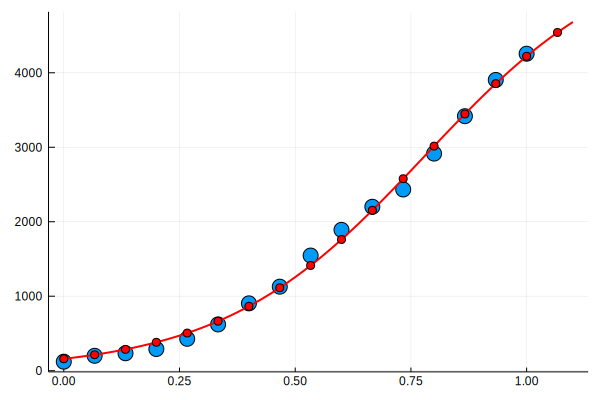

In [120]:
scatter(x, y, leg=false, ms=8)
β = output.solution

Δx = x[2] - x[1]
nnext = 1

xg = range(0, 1.0 + (nnext + 0.5) * Δx, length=100)
hx = [h(β, xi) for xi in xg]

plot!(xg, hx, c=:red, lw=2)

xnext = range(0.0, x[end] + nnext * Δx, length=n + nnext)
hnext = [h(β, xi) for xi in xnext]
scatter!(xnext, hnext, c=:red)

## Análise

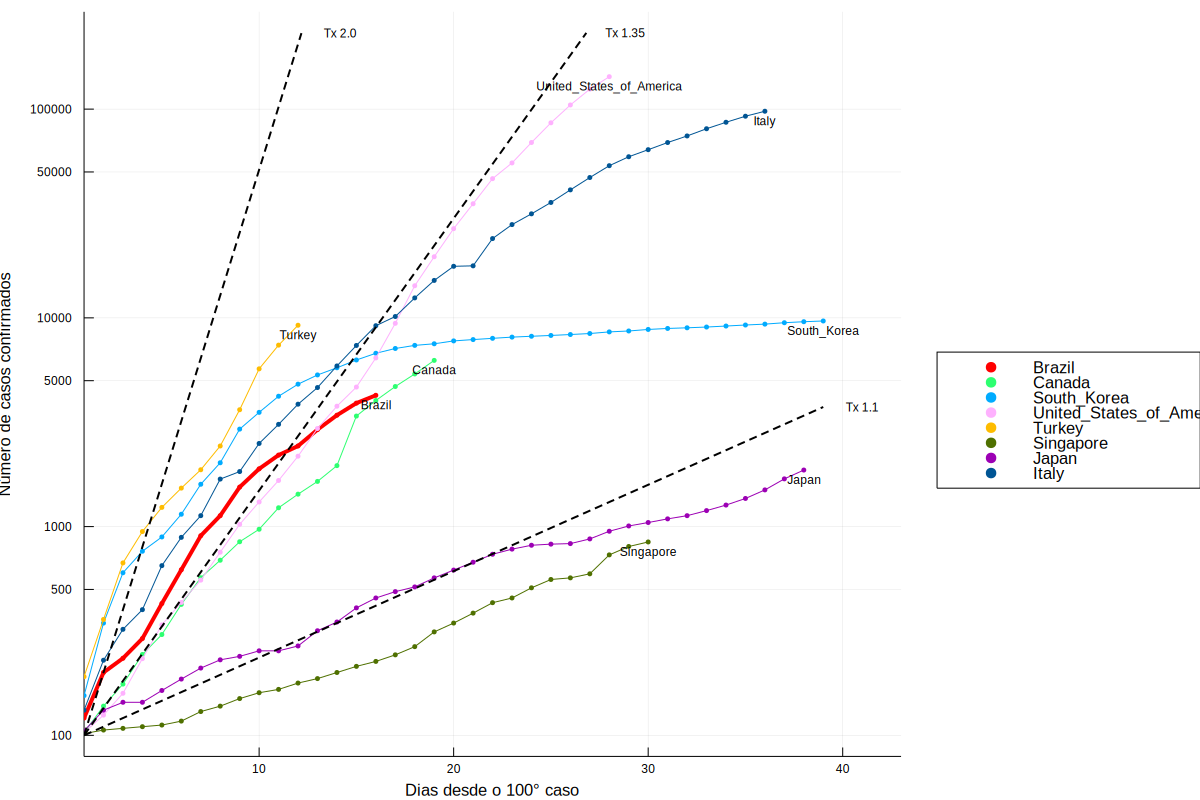

In [42]:
using Colors

plot(size=(1200,800), yaxis=:log)
#plot(size=(600,400), yaxis=:log)
dmax = ymax = 0.0
countries = ["Brazil", "Canada", "South_Korea", "United_States_of_America", "Turkey",
        "Singapore", "Japan", "Italy"]
clrs = distinguishable_colors(length(countries) + 1, [RGB(0, 0, 0), RGB(1.0, 0.0, 0.0)])[2:end]
for (j,c) in enumerate(countries)
    df = data[findall(data[!,:CountryExp] .== c),:]
    y = reverse(df.NewConfCases);
    y = cumsum(y)
    y = y[findfirst(y .≥ 100):end]
    #y = y[1:min(14, length(y))]

    lw = c == "Brazil" ? 4 : 1
    plot!(y, label="", c=clrs[j], lw=lw)
    scatter!(y, label=c, m=(3,stroke(0),clrs[j]))
    annotate!([length(y)], [y[end] * 0.9], text(c, 8))
    
    dmax = max(dmax, length(y))
    ymax = max(ymax, y[end])
end

for tx = [1.1; 1.35; 2.0]
    # (x - 1) ln(tx) = log(5ymax / 100)
    # x = ln(tx) + ln(5 ymax / 100) / ln(tx)
    xmax = min(log(tx) + log(2ymax / 100) / log(tx), dmax)
    plot!(x -> 100 * tx ^ (x - 1), 1, xmax, c=:black, l=:dash, lw=2, lab="")
    annotate!([xmax + 2], [100 * tx ^ (xmax - 1)], text("Tx $tx", 8))
end

plot!(legend=:outerright)
#plot!(leg=false)

tk = 100
TKS = [100]
TKS_L = ["100"]
while tk ≤ ymax
    push!(TKS, 5tk, 10tk)
    push!(TKS_L, string(5tk), string(10tk))
    tk = 10tk
end

#yticks!([10 .^ (1:ceil(Int, log10(ymax))); div.(10 .^ (1:ceil(Int, log10(ymax))), 2)])
yticks!(TKS, TKS_L)
xlims!(1, dmax + 4)
#ylims!(100.0, ymax * 5)
xlabel!("Dias desde o 100° caso")
ylabel!("Número de casos confirmados")

In [43]:
png("covid-2019-03-30-casos-por-pais")

In [96]:
NT = length(unique(data.dateRep))
y = zeros(length(NT), length(countries))
for (i,dt) in enumerate(unique(data.dateRep))
    if data
end

91

In [115]:
length(unique(data.dateRep))

91

In [91]:
[data[findall(data.CountryExp .== c),:].NewConfCases for c in countries]

8-element Array{Int64,1}:
 88
 91
 91
 91
 17
 91
 91
 91

75

┌ Info: Saved animation to 
│   fn = /home/abel/Documents/streaming/notebooks/covid-new-por-sum.gif
└ @ Plots /home/abel/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/home/abel/Documents/streaming/notebooks/covid-new-por-sum.gif")
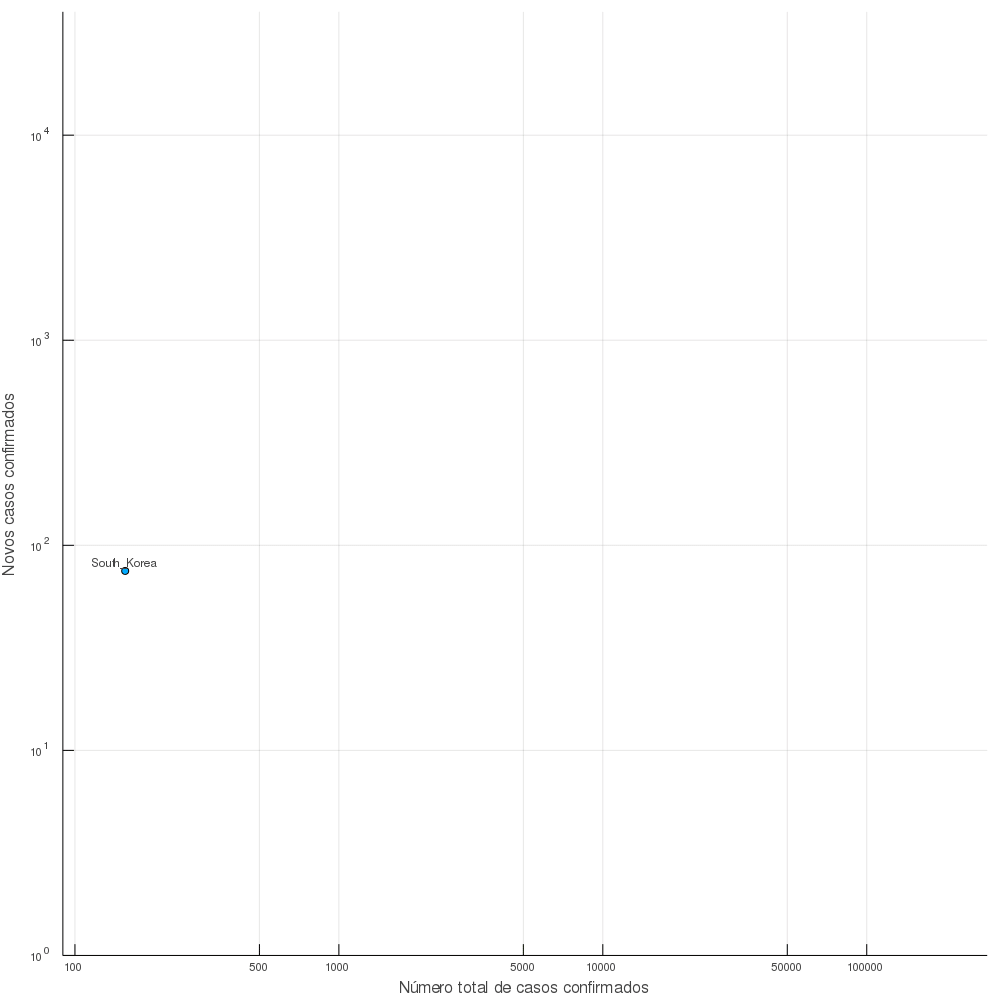

In [143]:
gr(size=(1000, 1000))

countries = ["Brazil", "Canada", "South_Korea", "United_States_of_America",
            "Turkey","Singapore", "Japan", "Italy"]
clrs = distinguishable_colors(length(countries) + 1,
        [RGB(0, 0, 0), RGB(1.0, 0.0, 0.0)])[2:end]

dias = unique(data.dateRep)
NT = length(dias)
y = zeros(NT, length(countries))
x = zeros(NT, length(countries))
for (j,c) in enumerate(countries)
    yc = data[findall(data.CountryExp .== c),:].NewConfCases
    y[1:length(yc),j] .= yc
    y[:,j] = reverse(y[:,j])
    x[:,j] = cumsum(y[:,j])
end

#I = maximum([findlast(y[:,j] .== 0) + 1 for j = 1:length(countries)]):NT
I = minimum([findfirst(x[:,j] .≥ 100) for j = 1:length(countries)]):NT
x = x[I,:]
y = y[I,:]
dias = dias[I]
NT = length(dias)

n = NT
t = range(1, n, length=10n)

tk = 100
TKS = [100]
TKS_L = ["100"]
while tk ≤ maximum(x)
    push!(TKS, 5tk, 10tk)
    push!(TKS_L, string(5tk), string(10tk))
    tk = 10tk
end

anim = Animation()

for ti in t
    N = floor(Int, ti)
    plot(xaxis=:log, yaxis=:log, leg=false)
    anyplot = false
    for (j,c) in enumerate(countries)
        k = findfirst(x[:,j] .≥ 100)
        
        if N < k
            continue
        end
        anyplot = true
        plot!(x[k:N,j], y[k:N,j], c=clrs[j])
        scatter!(x[k:N,j], y[k:N,j], c=clrs[j])
        λ = ti - N
        if N < n
            plot!([x[N,j], x[N,j] * (1 - λ) + x[N+1,j] * λ],
                  [y[N,j], y[N,j] * (1 - λ) + y[N+1,j] * λ], c=clrs[j])
            annotate!([x[N,j] * (1 - λ) + x[N+1,j] * λ],
                      [y[N,j] * (1 - λ) + y[N+1,j] * λ] * 1.1, text(c, 8))
        else
            annotate!([x[N,j]], [y[N,j]], text(c, 8))
        end
        #lw = c == "Brazil" ? 4 : 1
    end
    if !anyplot
        continue
    end
    xlims!(90, maximum(x) * 2)
    ylims!(1, maximum(y) * 2)
    
    #plot!(legend=:outerright)
    xticks!(TKS, TKS_L)
    xlabel!("Número total de casos confirmados")
    ylabel!("Novos casos confirmados")
    
    frame(anim)
end
gif(anim, "covid-new-por-sum.gif", fps=20)